<a href="https://colab.research.google.com/github/creativmind/python/blob/master/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINEAR REGRESSION MODEL**

In this project I have taken a data set which is similar to the project I have worked that contains various features based on which the yearly amount spent by a customer over the portal is predicted.

I have done various exploratory data analysis and designed a model to predict the target.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
up=files.upload()

Saving Ecommerce Customers to Ecommerce Customers


In [ ]:
import io
cust = pd.read_csv(io.BytesIO(up["Ecommerce Customers"]))
cust = pd.DataFrame(cust)

In [ ]:
type(cust)

pandas.core.frame.DataFrame

In [ ]:
cust.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


#**EXPLORATORY DATA ANALYSIS**

CREATING A JOINTPLOT FOR Time on Website VS Yearly Amount Spent

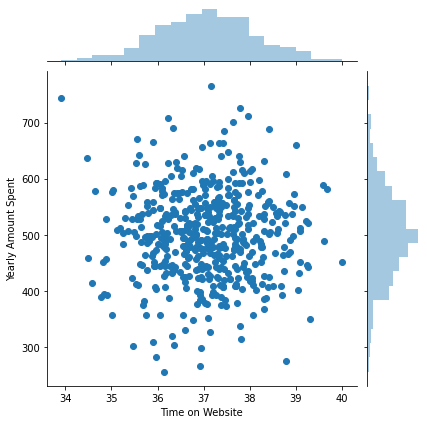

In [ ]:
sns.jointplot(data=cust,x="Time on Website",y="Yearly Amount Spent")

**CREATING A JOINTPLOT FOR Time on App VS Yearly Amount Spent**

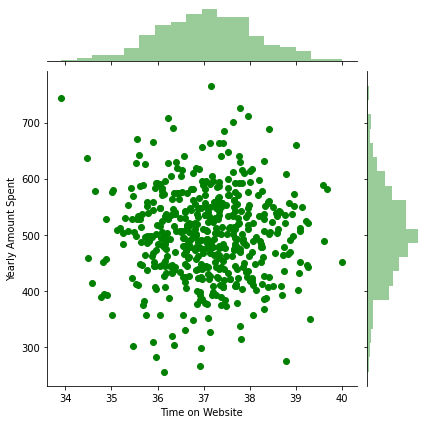

In [ ]:
sns.jointplot(data=cust,x="Time on Website",y="Yearly Amount Spent",color="Green")

**JOINTPLOT FOR 	Time on App VS Length of Membership USING 2D HEX BIN**

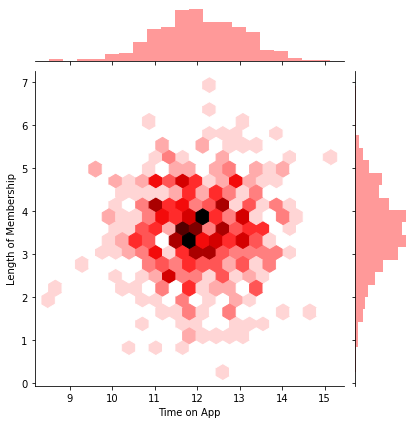

In [ ]:
sns.jointplot(data=cust, x="Time on App",y="Length of Membership",kind="hex",color="red")

**VISUALISING PAIRPLOT FOR CUST DATAFRAME**

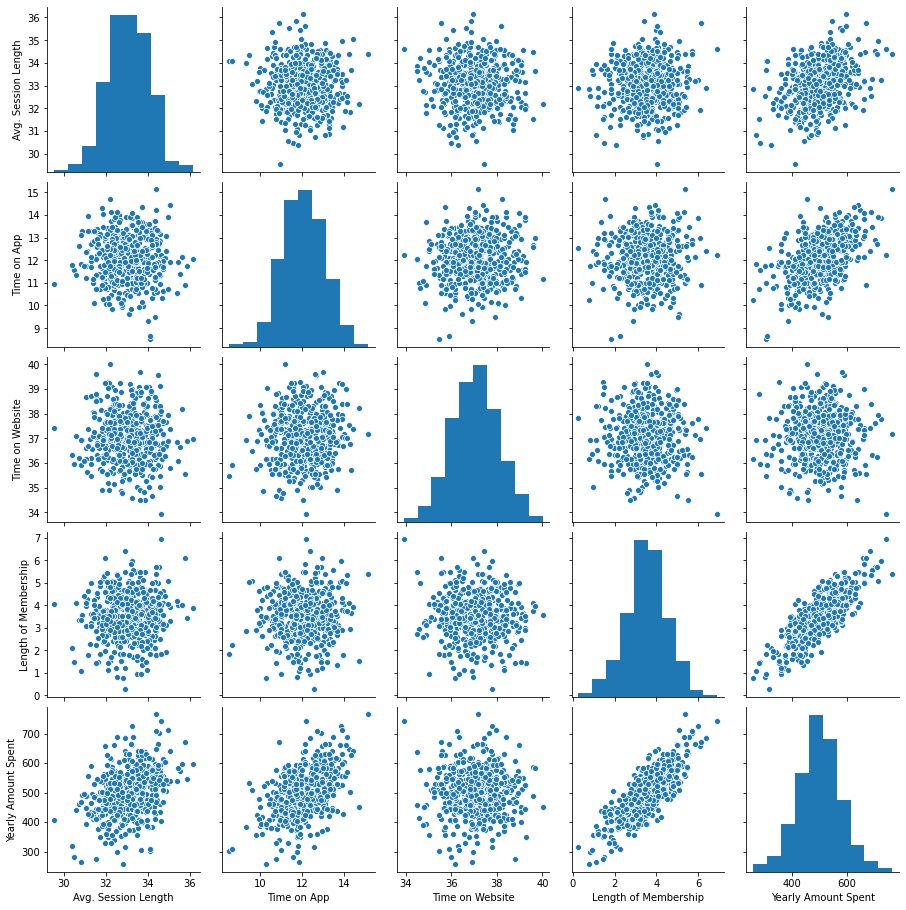

In [ ]:
sns.pairplot(data=cust)

**INFERENCE**:  yearly amount spent is highly corralated with length of membership

In [ ]:
cust.corr()["Yearly Amount Spent"]

Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

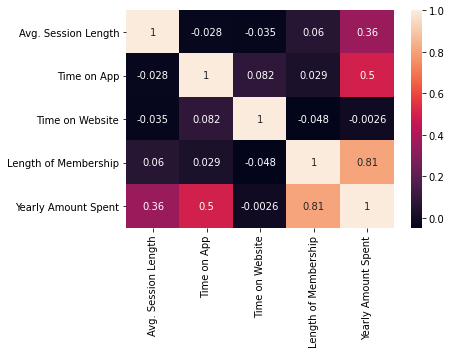

In [ ]:
sns.heatmap(cust.corr(),annot=True)

**INFERENCE**:  yearly amount spent is highly corralated with 

1.length of membership 

2.time on app

3.avg session length

**CREATING LINEAR MODEL FOR yearly amount spent VS length of membership**

USING lmplot

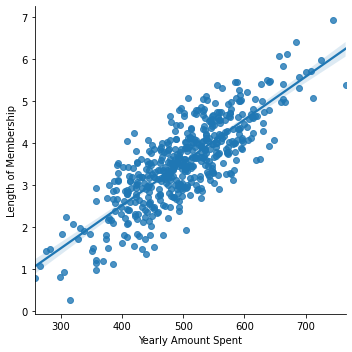

In [ ]:
sns.lmplot(data = cust, x='Yearly Amount Spent',y='Length of Membership')

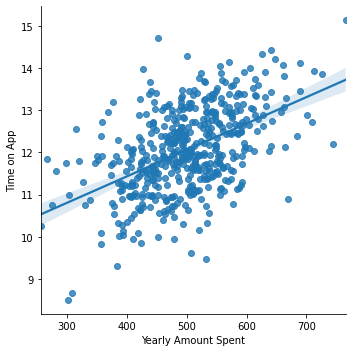

In [ ]:
sns.lmplot(data = cust, x='Yearly Amount Spent',y='

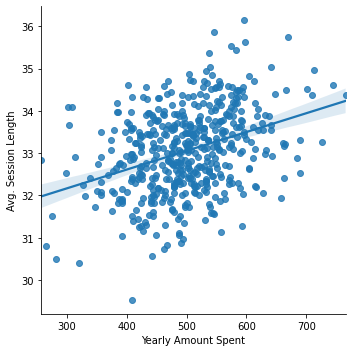

In [ ]:
sns.lmplot(data = cust, x='Yearly Amount Spent',y='Avg. Session Length')

In [ ]:
cust.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= cust[['Avg. Session Length', 
         'Time on App',
        'Length of Membership']].values

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(500, 3)

In [ ]:
y=cust["Yearly Amount Spent"].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Tracing the Coefficients**

these are the change produced per unit value

In [ ]:
coeff=lr.coef_
coeff

array([25.98759055, 38.60941287, 61.2690456 ])

**Inference**

How to interpret this coef_

In [ ]:
coef=pd.DataFrame(data=coeff,index=['Avg. Session Length','Time on App','Length of Membership'],columns=["coeff"])
coef

,coeff
Avg. Session Length,25.987591
Time on App,38.609413
Length of Membership,61.269046


**Prediction**

In [ ]:
pred= lr.predict(x_test)

**Creating a scatter plot for predicted vs real**

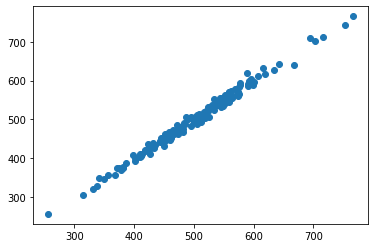

In [ ]:
plt.scatter(pred,y_test)

In [ ]:
type(pred)

numpy.ndarray

In [ ]:
pred.shape

(150,)

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
pred_to_series = pd.Series(pred.reshape(150,))


In [ ]:
y_test_to_df = pd.DataFrame(y_test)

In [ ]:
evaluate = pd.concat([pred_to_series,y_test_to_df],axis=1)

In [ ]:
evaluate.columns = ["pred","y_test"]

In [ ]:
evaluate

,pred,y_test
0,456.287340,452.315675
1,402.308973,401.033135
2,409.035247,410.069611
3,591.351703,599.406092
4,589.955342,586.155870
...,...,...
145,478.207390,479.731938
146,484.661459,488.387526
147,457.632661,461.112248
148,411.284999,407.704548


**EVALUATING THE ERRORS**

MAE/MSE/RMSE  mean absolute/mean square/realative mean sqaure

rmse = summation((predicted y - y mean)**2/ (true y- y mean)**2))

In [ ]:
from sklearn import metrics 

In [ ]:
MAE = metrics.mean_absolute_error(y_test,pred)
MSE = metrics.mean_squared_error(y_test,pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred))

In [ ]:
print("ABSOLUTE ERR: " ,MAE)
print("squared ERR: " ,MSE)
print("Root Mean ERR: " ,RMSE)

ABSOLUTE ERR:  7.236949056091432
squared ERR:  80.19544609397698
Root Mean ERR:  8.955191013818576


In [ ]:
mean=cust["Yearly Amount Spent"].mean()
mean

499.3140382585909

**calcuating the error percentage**

In [ ]:
error_perc = (MAE*100)/mean
error_perc

1.4493782472712036

#**INFERENCE : we have a very good model that found the output with least 1% error**

**Checking the variance for the predicted model how best the fit is?**

In [ ]:
score = metrics.explained_variance_score(y_test,pred)
print(score)

0.9890274992050442


**Distplot for the difference**

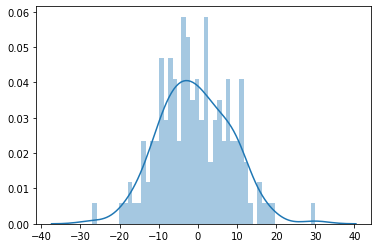

In [ ]:
sns.distplot((y_test-pred),bins=50)

**SCORE**

In [ ]:
lr.score(x_test,y_test)

0.9889519444377916